## SVD biased false
---
Surprise algorithm: SVD(biased=True, n_epochs = 100)

Hyperparameter: 
1. Threshold when do the recommendation
2. n_factors in SVD 
3. lambda (regularization term)
4. gamma (learning rate)
Things to do:
1. Calculate test loss
2. Do the recommendations (done)
3. Calculate precision, recall, f1

In [1]:
import numpy as np
import pandas as pd
import json
import numpy as np
import scipy.sparse as sp
import time
from collections import defaultdict

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rc
rc('figure', figsize=(16, 8), max_open_warning=False)

from surprise import SVD
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

import sys
sys.path.insert(0, '../src')

import preprocess
import evaluation

In [2]:
random_dict = preprocess.create_random_subset_paper_paper_data(debug=True)
traindict, testdict = preprocess.create_train_test_dic(random_dict)

trainset = preprocess.create_surprise_paper_paper_data(traindict).build_full_trainset()
testset  = preprocess.create_surprise_paper_paper_data(testdict).build_full_trainset().build_testset()

In [3]:
algo = SVD(biased=True, n_epochs = 100)
algo.fit(trainset)
predictions = algo.test(testset, clip=False)
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])

In [4]:
df[0:10]

,uid,iid,rui,est,details
0,9753c508-20e1-4f9b-baf4-f0c49008dcbc,d578fe46-9b3d-4425-8e2b-a2aac2170b06,1.0,0.804601,{'was_impossible': False}
1,f1dede99-ff4e-4e9a-8950-2f91c9c02f6a,5e7b1c2c-baaf-466d-be01-c075002bf1fb,1.0,0.921268,{'was_impossible': False}
2,f1dede99-ff4e-4e9a-8950-2f91c9c02f6a,e8cbffc8-d292-4d4b-ae22-f96c645e4461,1.0,1.064158,{'was_impossible': False}
3,ed43ebb5-f6c4-4a3e-9ea3-8e5c17de7178,8188df0c-955f-4fef-961d-c67ae2ee3799,1.0,0.918429,{'was_impossible': False}
4,5d98c64a-c521-41f7-95f9-eb07a4c40196,f967618b-e047-43a9-bea8-44b9e74d708f,1.0,1.063096,{'was_impossible': False}
5,2ced1d5a-a5ff-4860-99d2-9832b11b1f40,978efa8a-b62a-4e76-a2a1-c3a7af5e1a60,1.0,1.062554,{'was_impossible': False}
6,c59e69d0-32bb-416c-aed2-3211aa5ceb30,71f4c930-83fe-4cf2-b895-264d716e02b2,1.0,0.810894,{'was_impossible': False}
7,b2336fd0-40a2-4c1f-9c4b-fcbfd5c68ac4,d35738a8-0c5f-4788-bbcc-ef55a504be78,1.0,1.127195,{'was_impossible': False}
8,c4161e2c-84c1-4b71-a63a-33230f5ebce9,70f4dcf0-2784-4627-899c-1463988a3f52,1.0,0.900261,{'was_impossible': False}
9,d9194ae3-7fa8-4c1c-a681-d1bac8050fa7,3662e5bc-d634-43c2-90fe-f18ebd3033f4,1.0,1.078955,{'was_impossible': False}


In [5]:
accuracy.rmse(predictions)

RMSE: 0.0984


0.098387046313409235

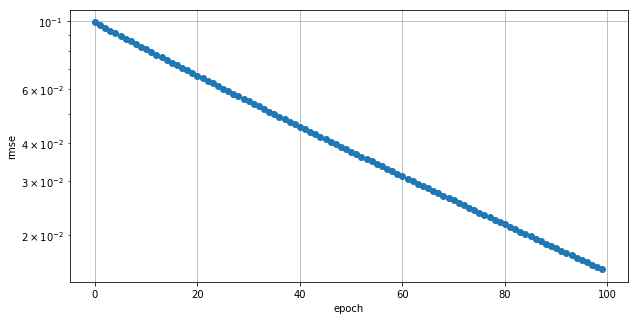

In [6]:
# Comment out following code if not using --
#  https://github.com/MelodyShih/Surprise/tree/1003-project
loss = algo.losshistory
fig, ax = plt.subplots(figsize=(10, 5))
ax.semilogy(range(len(loss)), loss, '--o')
ax.set_xlabel('epoch')
ax.set_ylabel('rmse')
plt.grid(True)

In [7]:
trainestdata = trainset.build_testset()
trainpredictions = algo.test(trainestdata, clip=False)
rmse = accuracy.rmse(trainpredictions)
print(loss[-1])

RMSE: 0.0152
0.0154714529927


In [8]:
factors_to_try = [5,10,50,100,300,500,1000]
rmse_train = np.zeros(len(factors_to_try))
rmse_test = np.zeros(len(factors_to_try))
elapsed_time = np.zeros(len(factors_to_try))
for i in range(len(factors_to_try)):
    nfactors = factors_to_try[i]
    
    t = time.time()
    algo = SVD(biased=True, n_epochs = 300, n_factors = nfactors)
    algo.fit(trainset)
    elapsed_time[i] = time.time() - t
    
    testpredictions  = algo.test(testset, clip=False)
    trainpredictions = algo.test(trainestdata, clip=False)
    
    rmse_train[i] = accuracy.rmse(trainpredictions)
    rmse_test[i]  = accuracy.rmse(testpredictions)
    print(rmse_train[i], rmse_test[i], 'time = ', elapsed_time[i])

RMSE: 0.0017
RMSE: 0.0239
0.00170510746723 0.0239279363567 time =  1.00419998169
RMSE: 0.0023
RMSE: 0.0318
0.00229365468329 0.031798042068 time =  1.2379591465
RMSE: 0.0020
RMSE: 0.0663
0.00196014536528 0.0663021594415 time =  2.30563306808
RMSE: 0.0013
RMSE: 0.0970
0.00129660332676 0.0969949018155 time =  5.3576130867
RMSE: 0.0009
RMSE: 0.1536
0.000914811214808 0.15359881628 time =  13.2403771877
RMSE: 0.0005
RMSE: 0.1935
0.000537336351843 0.193470687196 time =  27.7973928452
RMSE: 0.0003
RMSE: 0.2772
0.000251261573722 0.277233557656 time =  56.2692399025


Text(0,0.5,'seconds')

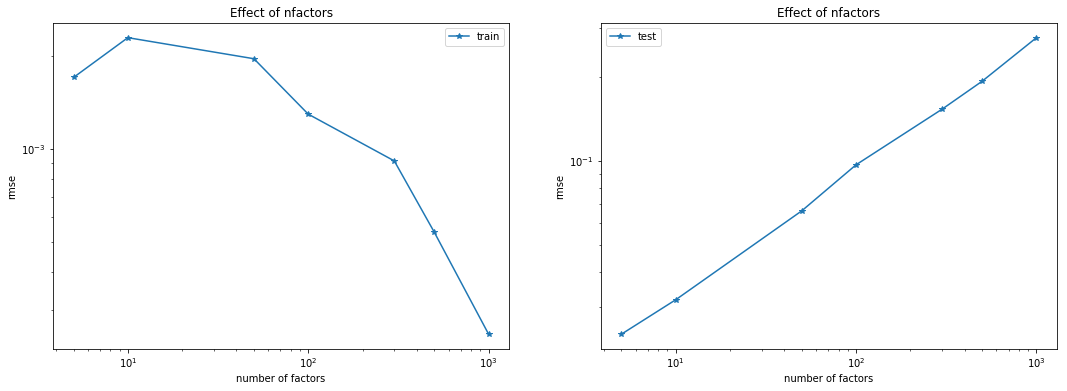

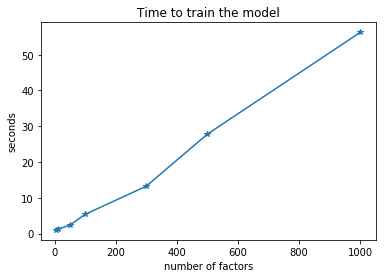

In [9]:
fig, axes = plt.subplots(1,2,figsize=(18,6))

# axes[0].plot(factors_to_try, rmse_train, '-*', label="train")
axes[0].loglog(factors_to_try, rmse_train, '-*', label="train")
axes[0].set_title('Effect of nfactors')
axes[0].set_xlabel('number of factors')
axes[0].set_ylabel('rmse')
axes[0].legend()

axes[1].loglog(factors_to_try, rmse_test, '-*', label="test")
axes[1].set_title('Effect of nfactors')
axes[1].set_xlabel('number of factors')
axes[1].set_ylabel('rmse')
axes[1].legend()

fig, axes = plt.subplots(figsize=(6,4))
axes.plot(factors_to_try, elapsed_time, '-*')
axes.set_title('Time to train the model')
axes.set_xlabel('number of factors')
axes.set_ylabel('seconds')

### lambda

In [10]:
nfactors = 50
reg_lambdas = 10**np.linspace(-3,2,6)
rmse_train = np.zeros(len(reg_lambdas))
rmse_test  = np.zeros(len(reg_lambdas))
elapsed_time = np.zeros(len(reg_lambdas))
for i in range(len(reg_lambdas)):
    reg_lambda = reg_lambdas[i]
    
    t = time.time()
    algo = SVD(biased=True, n_epochs = 500, n_factors = nfactors, reg_all=reg_lambda)
    algo.fit(trainset)
    elapsed_time[i] = time.time() - t
    
    testpredictions  = algo.test(testset, clip=False)
    trainpredictions = algo.test(trainestdata, clip=False)
    
    rmse_train[i] = accuracy.rmse(trainpredictions)
    rmse_test[i]  = accuracy.rmse(testpredictions)
    print(reg_lambda,rmse_train[i], rmse_test[i], 'time = ', elapsed_time[i])

RMSE: 0.0004
RMSE: 0.0768
0.001 0.000375602070062 0.0767972872518 time =  4.74796915054
RMSE: 0.0011
RMSE: 0.0697
0.01 0.00105812887007 0.069657461087 time =  4.08020591736
RMSE: 0.0020
RMSE: 0.0385
0.1 0.00196383465299 0.0384967243951 time =  5.60591602325
RMSE: 0.0003
RMSE: 0.0005
1.0 0.000265270353915 0.000460780854807 time =  5.82930779457
RMSE: 0.0000
RMSE: 0.0000
10.0 1.08881001982e-15 1.5568682504e-15 time =  4.14447712898
RMSE: 0.0000
RMSE: 0.0000
100.0 0.0 0.0 time =  5.16415286064


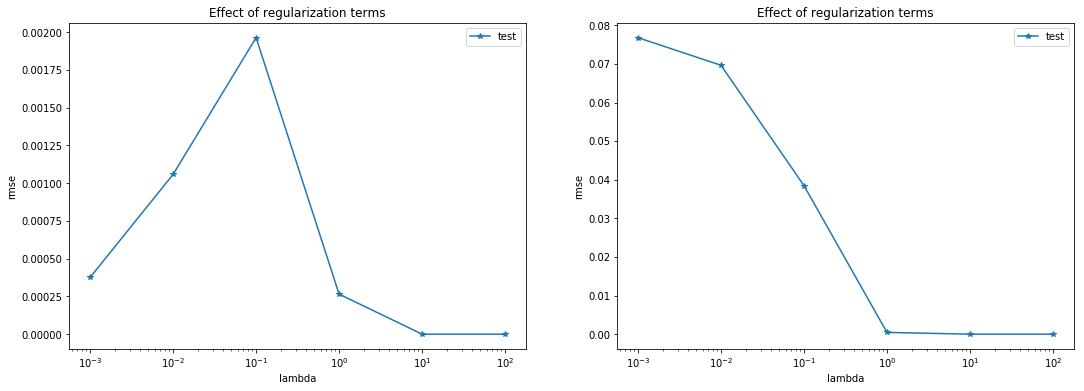

In [67]:
fig, axes = plt.subplots(1,2,figsize=(18,6))

# axes[0].plot(factors_to_try, rmse_train, '-*', label="train")
axes[0].semilogx(reg_lambdas, rmse_train, '-*', label="test")
axes[0].set_title('Effect of regularization terms')
axes[0].set_xlabel('lambda')
axes[0].set_ylabel('rmse')
axes[0].legend()

axes[1].semilogx(reg_lambdas, rmse_test, '-*', label="test")
axes[1].set_title('Effect of regularization terms')
axes[1].set_xlabel('lambda')
axes[1].set_ylabel('rmse')
axes[1].legend()

## Reasons that this method doesn't work

All the ratings are 1. If we are minimizing RMSE, the algorithms will end with p = q = 0, which will give us prediction = pu = global_mean = 1.

In [59]:
algo = SVD(biased=True, n_epochs = 500, n_factors = 50, reg_all=100)
algo.fit(trainset)

In [60]:
algo.pu

array([[  1.57587442e-153,  -3.32147716e-152,  -8.00314061e-153, ...,
         -4.18003731e-152,  -1.10307075e-153,   9.84985895e-153],
       [  1.95395318e-152,   2.98774447e-152,   1.14333752e-152, ...,
         -5.79300462e-152,  -5.52830788e-152,  -8.38021972e-153],
       [  2.69672052e-152,  -3.18157642e-152,   1.19474811e-152, ...,
         -3.54828922e-152,  -3.19592341e-152,  -3.87933584e-152],
       ..., 
       [ -1.71593975e-152,  -4.46571641e-152,  -2.94384786e-153, ...,
          3.38655615e-152,   2.74090862e-152,   4.88308407e-152],
       [  2.15783141e-153,  -6.07190261e-152,  -2.75449087e-152, ...,
         -1.21649683e-152,   2.99875315e-152,  -5.96000712e-153],
       [ -2.79729283e-152,  -5.75095011e-152,  -3.16936937e-153, ...,
          4.60150250e-153,  -1.75519897e-153,  -3.61217062e-154]])

In [69]:
algo.qi

array([[ 0.07825842,  0.0318865 ,  0.07263327, ..., -0.02146269,
         0.00806208, -0.12802708],
       [ 0.02307126, -0.10367432, -0.13424015, ..., -0.0691398 ,
        -0.050761  , -0.06748378],
       [ 0.08041293,  0.09804968, -0.08244049, ...,  0.12679593,
        -0.01704204,  0.09003799],
       ..., 
       [ 0.11468834, -0.04846104, -0.16118562, ..., -0.09033943,
         0.01187609, -0.03551363],
       [-0.15638112, -0.01188716, -0.00173585, ...,  0.01942093,
         0.13443632,  0.01985997],
       [ 0.08027959,  0.0318066 , -0.28369   , ...,  0.07717346,
        -0.02957921, -0.00936454]])

## Precision and Recall

In [64]:
algo = SVD(biased=True, n_epochs = 300, n_factors = 100)
algo.fit(trainset)

user_ids = list(testdict.keys())
user_est_true = evaluation.prediction_for_userids(algo, trainset, testdict, user_ids)

In [65]:
thresholds = np.linspace(-3,3,100)
precision = np.zeros(len(thresholds))
recall = np.zeros(len(thresholds))
f1 = np.zeros(len(thresholds))

for t,threshold in enumerate(thresholds):
    precisions, recalls = evaluation.precision_recall_at_k(user_est_true, testdict, k=10, threshold=threshold)
    precision[t] = sum(prec for prec in precisions.values()) / len(precisions)
    recall[t] = sum(rec for rec in recalls.values()) / len(recalls)
    f1[t] = 2*(precision[t]*recall[t])/(precision[t]+recall[t])
#     print(precision[t], recall[t])

Text(0,0.5,'precision')

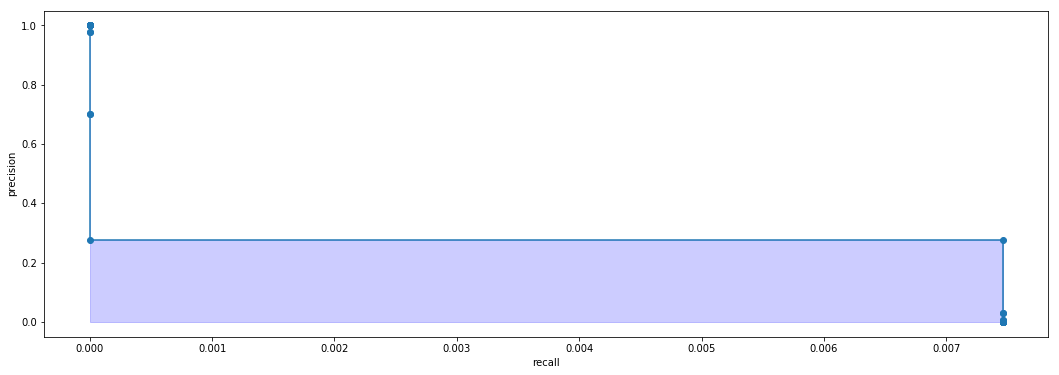

In [66]:
fig, axes = plt.subplots(1,1,figsize=(18,6))
axes.step(recall,precision,'-o',where='post')
axes.fill_between(recall, precision, step='post',alpha=0.2,color='b')
axes.set_xlabel('recall')
axes.set_ylabel('precision')

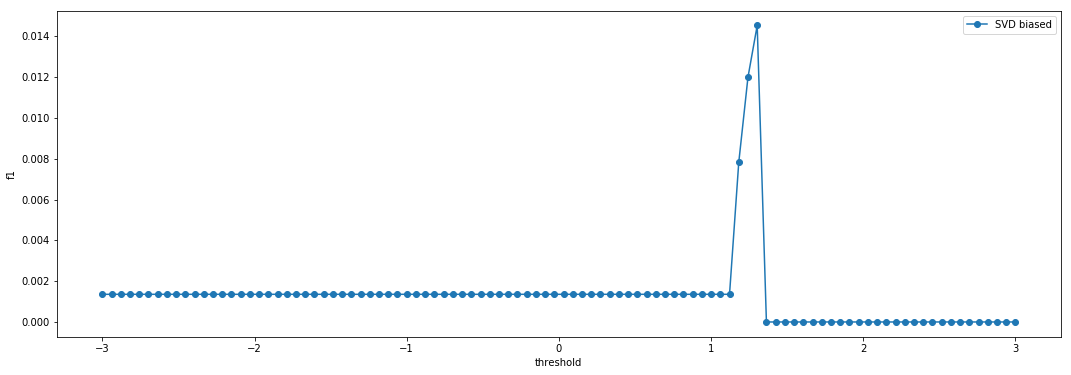

In [68]:
fig, axes = plt.subplots(1,1,figsize=(18,6))
axes.plot(thresholds,f1,'-o', label='SVD biased')
axes.set_xlabel('threshold')
axes.set_ylabel('f1')
axes.legend()